In [3]:
import mdtraj as md
import numpy as np
from matplotlib.pylab import *

In [2]:
dpdro3_4_t1 = md.load('/Users/caixiuhong/Dropbox/cai/btype_cco/snapshot/Btype CcO MD/Btype CcO MD/4_dpdro3/md_nvt_25ns_100.dcd',\
             top='/Users/caixiuhong/Dropbox/cai/btype_cco/snapshot/Btype CcO MD/Btype CcO MD//4_dpdro3/md_nvt_init.pdb')


In [5]:
print(dpdro3_4_t1)


<mdtraj.Trajectory with 251 frames, 105353 atoms, 23391 residues, and unitcells>


In [6]:
##atom selection
ser_309=[atom for atom in dpdro3_4_t1.topology.atoms if ((atom.residue.name == 'SER') and (atom.residue.index == 302))]
print(ser_309)
ser_309_o=ser_309[7]
print(ser_309_o)

thr_312=[atom for atom in dpdro3_4_t1.topology.atoms if ((atom.residue.name == 'THR') and (atom.residue.index == 305))]
print(thr_312)
thr_312_o=thr_312[6]
thr_312_h=thr_312[7]
print(thr_312_o)

tyr_244=[atom for atom in dpdro3_4_t1.topology.atoms if ((atom.residue.name == 'TYR') and (atom.residue.index == 237))]
tyr_244_o=tyr_244[13]

tyr_248=[atom for atom in dpdro3_4_t1.topology.atoms if ((atom.residue.name == 'TYR') and (atom.residue.index == 241))]
tyr_248_o=tyr_248[13]
tyr_248_h=tyr_248[14]
print(tyr_248_h)

thr_315=[atom for atom in dpdro3_4_t1.topology.atoms if ((atom.residue.name == 'THR') and (atom.residue.index == 308))]
print(thr_315)
thr_315_o=thr_315[6]
thr_315_h=thr_315[7]
print(thr_315)

[SER303-N, SER303-H, SER303-CA, SER303-HA, SER303-CB, SER303-HB3, SER303-HB2, SER303-OG, SER303-HG, SER303-C, SER303-O]
SER303-OG
[THR306-N, THR306-H, THR306-CA, THR306-HA, THR306-CB, THR306-HB, THR306-OG1, THR306-HG1, THR306-CG2, THR306-HG21, THR306-HG22, THR306-HG23, THR306-C, THR306-O]
THR306-OG1
TYR242-HH
[THR309-N, THR309-H, THR309-CA, THR309-HA, THR309-CB, THR309-HB, THR309-OG1, THR309-HG1, THR309-CG2, THR309-HG21, THR309-HG22, THR309-HG23, THR309-C, THR309-O]
[THR309-N, THR309-H, THR309-CA, THR309-HA, THR309-CB, THR309-HB, THR309-OG1, THR309-HG1, THR309-CG2, THR309-HG21, THR309-HG22, THR309-HG23, THR309-C, THR309-O]


In [7]:
def if_hb(trj, don_at, don_h, acc_at):
    #input trajectory, donor atom, donor H and acceptor atom in a trajectory, 
    #return 1 if hydrogen bonded between the supplied atoms in each frame of a trajectory, 0 otherwise
    #criterior: distance Donor atom ---acceptor atom dist < 4.0 anstrom, angle >90 degree
    pair= np.asarray([[don_at.index, acc_at.index]])
    tup=np.asarray([[don_at.index,don_h.index,acc_at.index]])
    dist=md.compute_distances(trj, pair, periodic=False)
    ang=md.compute_angles(trj, tup, periodic=False)
    
    
    hbs=[]
    for i in range(trj.n_frames):
        if ((dist[i])*10 < 4.0) and ((ang[i])*180/np.pi > 90 ) :
            hb=[1]
        else: 
            hb=[0]
            #print('broken')
        hbs.append(hb)
    return np.asarray(hbs)

In [15]:
hb_tyr248_thr312_1=if_hb(dpdro3_4_t1,tyr_248_o, tyr_248_h, thr_312_o)

hb_tyr248_thr312=np.concatenate((hb_tyr248_thr312_1), axis=0)

hb_thr315_tyr248_1=if_hb(dpdro3_4_t1,thr_315_o, thr_315_h, tyr_248_o)

hb_thr315_tyr248=np.concatenate((hb_thr315_tyr248_1), axis=0)

hb_thr312_tyr244_1=if_hb(dpdro3_4_t1,thr_312_o, thr_312_h, tyr_244_o)

hb_thr312_tyr244=np.concatenate((hb_thr312_tyr244_1), axis=0)


In [35]:
def trip_point(f1,f2,f3):
    tri_points=[]
    for i in range(len(f1)):
        if (f1[i]==f2[i]==f3[i]):
            tri_point=[i,f1[i]]
            tri_points.append(tri_point)
    return tri_points

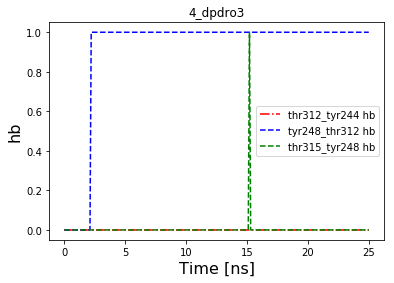

In [57]:
from matplotlib.pylab import *
time=dpdro3_4_t1.time



plot(time/10, hb_thr312_tyr244, 'r-.', label='thr312_tyr244 hb')
plot(time/10, hb_tyr248_thr312, 'b--', label='tyr248_thr312 hb')
plot(time/10, hb_thr315_tyr248, 'g--', label='thr315_tyr248 hb')

xlabel('Time [ns]', size=16)
ylabel('hb', size=16)
legend()
'''
##plot triple points
trip_points=trip_point(hb_thr312_tyr244,hb_tyr248_thr312,hb_thr315_tyr248)
#print(trip_points)
tri_real_times=[]
tri_points=[]
for i in range(len(trip_points)):
    tri_time=trip_points[i][0]
    tri_real_time=time[tri_time]/10
    #print(tri_real_time)
    tri_point=trip_points[i][1]
    tri_real_times.append(tri_real_time)
    tri_points.append(tri_point)
#print(tri_real_times)
plt.plot(tri_real_times, tri_points, 'ro')
##
'''
title('4_dpdro3')
savefig('4_dpdro3.png')
show()

In [4]:
def dist_ang(trj, don_at, don_h, acc_at):
    #input trajectory, donor atom, donor H and acceptor atom in a trajectory, 
    #return distance between don_atom and acc_atom and the angle between them.
    pair= np.asarray([[don_at.index, acc_at.index]])
    tup=np.asarray([[don_at.index,don_h.index,acc_at.index]])
    dist=md.compute_distances(trj, pair, periodic=False)
    ang=md.compute_angles(trj, tup, periodic=False)
    return dist, ang

In [7]:
tyr248_thr312_dist_1,tyr248_thr312_ang_1 =dist_ang(dpdro3_4_t1,tyr_248_o, tyr_248_h, thr_312_o)
tyr248_thr312_dist=tyr248_thr312_dist_1
tyr248_thr312_ang=tyr248_thr312_ang_1

thr315_tyr248_dist_1,thr315_tyr248_ang_1 =dist_ang(dpdro3_4_t1,thr_315_o, thr_315_h, tyr_248_o)
thr315_tyr248_dist=np.concatenate((thr315_tyr248_dist_1), axis=0)
thr315_tyr248_ang=np.concatenate((thr315_tyr248_ang_1), axis=0)

thr312_tyr244_dist_1,thr312_tyr244_ang_1=dist_ang(dpdro3_4_t1,thr_312_o, thr_312_h, tyr_244_o)
thr312_tyr244_dist=np.concatenate((thr312_tyr244_dist_1), axis=0)
thr312_tyr244_ang=np.concatenate((thr312_tyr244_ang_1), axis=0)

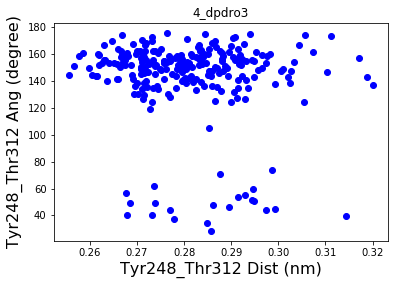

In [8]:
fig, ax1 = plt.subplots()
ax1.plot(tyr248_thr312_dist,tyr248_thr312_ang*180/np.pi,'bo')
ax1.set_xlabel('Tyr248_Thr312 Dist (nm)', size=16)
ax1.set_ylabel('Tyr248_Thr312 Ang (degree)', size=16)
title('4_dpdro3')
savefig('4_dpdro3_y248_t312.png')
show()

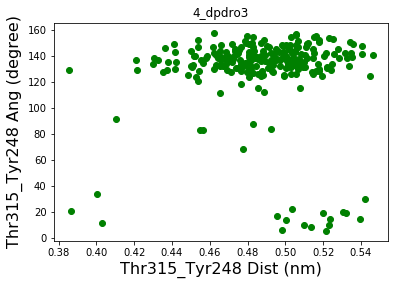

In [9]:
fig, ax1 = plt.subplots()
ax1.plot(thr315_tyr248_dist,thr315_tyr248_ang*180/np.pi,'go')
ax1.set_xlabel('Thr315_Tyr248 Dist (nm)', size=16)
ax1.set_ylabel('Thr315_Tyr248 Ang (degree)', size=16)
title('4_dpdro3')
savefig('4_dpdro3_t315_y248.png')
show()

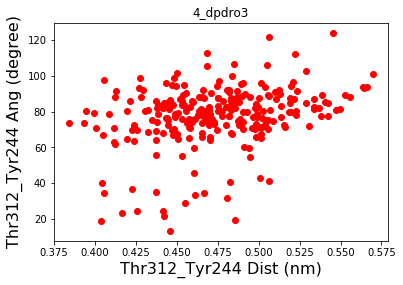

In [10]:
fig, ax1 = plt.subplots()
ax1.plot(thr312_tyr244_dist,thr312_tyr244_ang*180/np.pi,'ro')
ax1.set_xlabel('Thr312_Tyr244 Dist (nm)', size=16)
ax1.set_ylabel('Thr312_Tyr244 Ang (degree)', size=16)
title('4_dpdro3')
savefig('4_dpdro3_t312_y244.png')
show()

In [13]:
q=np.asarray([thr_312_o.index])
haystack=[atom.index for atom in dpdro3_4_t1.topology.atoms if (atom.residue.is_water and (atom.name == 'O'))]

wat_thr312_1=md.compute_neighbors(dpdro3_4_t1, 0.4,q,haystack)
wat_thr312_num_1=[ len(wat_thr312_1[i]) for i in range(len(wat_thr312_1))]

wat_thr312_num=wat_thr312_num_1




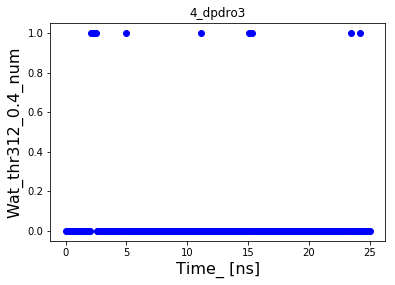

In [14]:
time=dpdro3_4_t1.time
#print(time)

plot(time/10, wat_thr312_num, 'bo')

xlabel('Time_ [ns]', size=16)
ylabel('Wat_thr312_0.4_num', size=16)
title('4_dpdro3')
savefig('4_dpdro3_wat_thr312_num.png')
show()